Lai Chee Seng 34075151

FIT 1043 Assignment 2

# Task A

In [8]:
# A1.1
import pandas as pd
import matplotlib.pyplot as plt
student_list = pd.read_csv('Student_List_A2.csv')
student_list.columns.tolist()

['StudentID',
 'Age',
 'StudyTimeWeekly',
 'Absences',
 'ParentalSupport',
 'GPA',
 'GradeClass']

The column names are: StudentID, Age, StudyTimeWeekly, Absences, ParentalSupport, GPA and GradeClass

In [10]:
# A1.2
grade_mapping = {0:'A', 1:'B', 2:'C', 3:'D', 4:'F'}
student_list['GradeClass'] = student_list['GradeClass'].replace(grade_mapping)
student_list['GradeClass'].unique()

array(['B', 'F', 'D', 'C', 'A'], dtype=object)

In [11]:
# A1.3
print(student_list.shape)
print(student_list.info())
median = student_list['StudyTimeWeekly'].median()
student_list.fillna(median, inplace = True)

(2100, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2100 non-null   int64  
 1   Age              2100 non-null   int64  
 2   StudyTimeWeekly  2079 non-null   float64
 3   Absences         2100 non-null   int64  
 4   ParentalSupport  2100 non-null   int64  
 5   GPA              2100 non-null   float64
 6   GradeClass       2100 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 115.0+ KB
None


I checked the dataframe's shape 2100x7 and used .info() to find columns with missing values. The 'StudyTimeWeekly' column had missing data, which I filled using the median with fillna() filling in all the null values in this column with the median.

In [13]:
# A1.4
print(student_list['Absences'].unique())
filt = (student_list['Absences'] >= 0) & (student_list['Absences'] <= 30)
student_list = student_list[filt]

[   0   26   14   17   10   22    1   11   15   21    9   16   29    2
   25   20    5    8   12   27   23    3    7   13    6   28    4   18
   19   24  320 -122]


By using the .unique() function onto the 'Absences' column, all the unique values are displayed. From this, I identified the extreme values -122 and 320 and removed the rows that exhibits this problem.

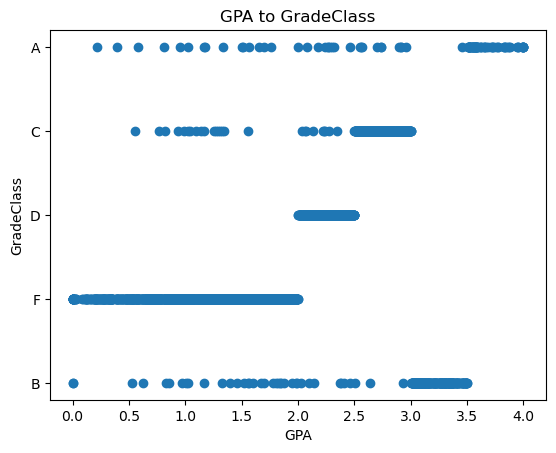

In [15]:
# A1.5
plt.scatter(student_list['GPA'], student_list['GradeClass'])
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.title('GPA to GradeClass')
plt.show()

By plotting a GPA to GradeClass scatter plot diagram we can see that the GradeClass does not correspond to the GPA values as expected.

In [17]:
bins = [0, 2.0, 2.5, 3.0, 3.5, 4.1]
grade_labels = ['F', 'D', 'C', 'B', 'A']
student_list['GradeClass'] = pd.cut(student_list['GPA'], bins=bins, labels=grade_labels, right=False)

I replaced all the GradeClass values according to the grading table provided in question A1.2, which corresponds to the GPA column.

#### A2.1

Supervised machine learning is a type of machine learning where a model is trained on a labeled dataset. The goal is for the model to learn from train datasets so it can make predictions or decisions based on new, unseen data, the accuracy of this model will be calculated by comparing it with the test dataset.

In [20]:
# A2.2
student_list.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


GradeClass will be used as label

Age, StudyTimeWeekly, Absences and ParentalSupport will be used as features

In [22]:
X = student_list.iloc[:, [1,2,3,4]].values
y = student_list.iloc[:, [6]].values

In [23]:
# A2.3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 0
)
y_train = y_train.ravel()
y_test = y_test.ravel()

#### A3.1.a

In machine learning, normalizing data refers to scaling data so they are on a similar scale, typically within a specific range, this is important because many machine learning models rely on distances or gradiants of a dataset. 

In [25]:
# A3.1.b
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### A3.2.a

A Support Vector Machine (SVM) is a machine learning algorithm used to classify data into different categories. It works by finding a line or plane that best separates the data points of different classes.

#### A3.2.b

Kernel is a mathametical function used in SVM models to transform data into a higher-dimension space. This basically means to create a seperation in a new space where it becomes easier to distinguish the classes between one another.

In [28]:
# A3.2.c
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# A3.3
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(
n_estimators = 20,
criterion = 'entropy',
random_state = 0)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [30]:
# A4.1
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = RandomForest.predict(X_test)

In [31]:
# A4.2
from sklearn.metrics import confusion_matrix, accuracy_score

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"SVM accuracy : {accuracy_score(y_test, y_pred_svm)*100}")
print(cm_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest accuracy : {accuracy_score(y_test, y_pred_rf)*100}")
print(cm_svm)

SVM accuracy : 75.95238095238095
[[  0  18   0   0   0]
 [  0  19  23   1   0]
 [  0   9  40   9   1]
 [  0   0  13  46  19]
 [  0   0   0   8 214]]
Random Forest accuracy : 72.38095238095238
[[  0  18   0   0   0]
 [  0  19  23   1   0]
 [  0   9  40   9   1]
 [  0   0  13  46  19]
 [  0   0   0   8 214]]


A4.3

SVM Accuracy: 319/420 = 0.7595 = 75.95%

Random Forest Accuracy: 304/420 = 0.7238 = 72.38%

From the accuracy calculated from each confusion table, SVM is a more accurate therefor SVM performed better.

In [33]:
# A5.1
student_list_submission = pd.read_csv('Student_List_A2_Submission.csv')
student_list_submission.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
0,5000,16,13.274090,27,1
1,5001,17,16.926360,6,2
2,5002,15,4.225258,15,3
3,5003,16,18.839829,17,3
4,5004,15,9.075075,6,2


In [34]:
# A5.2
X = student_list_submission.iloc[:, [1,2,3,4]].values
X = sc.transform(X)
predictions = svm_model.predict(X)
print(predictions)

submission_df = pd.DataFrame({
    'StudentID': student_list_submission['StudentID'],
    'GradeClass': predictions
})
submission_df.to_csv('predictions.csv', index=False)

['F' 'C' 'F' 'D' 'C' 'C' 'C' 'F' 'C' 'F' 'F' 'F' 'F' 'C' 'F' 'C' 'F' 'D'
 'D' 'C' 'F' 'F' 'C' 'C' 'F' 'F' 'B' 'F' 'F' 'F' 'F' 'F' 'B' 'F' 'F' 'C'
 'B' 'F' 'F' 'F' 'F' 'F' 'C' 'C' 'F' 'D' 'B' 'F' 'C' 'F' 'B' 'D' 'F' 'F'
 'C' 'F' 'D' 'F' 'F' 'F' 'F' 'C' 'B' 'D' 'D' 'F' 'F' 'F' 'F' 'D' 'C' 'F'
 'F' 'D' 'F' 'C' 'F' 'F' 'C' 'F' 'C' 'B' 'F' 'B' 'F' 'B' 'C' 'C' 'F' 'F'
 'C' 'F' 'F' 'D' 'C' 'F' 'F' 'F' 'F' 'F' 'C' 'C' 'F' 'D' 'F' 'F' 'C' 'F'
 'D' 'F' 'D' 'F' 'D' 'F' 'F' 'F' 'B' 'F' 'F' 'C' 'F' 'D' 'B' 'F' 'F' 'F'
 'C' 'F' 'F' 'F' 'F' 'B' 'B' 'F' 'C' 'B' 'C' 'F' 'F' 'F' 'F' 'C' 'D' 'B'
 'F' 'F' 'F' 'F' 'F' 'F' 'D' 'F' 'B' 'D' 'F' 'F' 'D' 'F' 'F' 'C' 'F']


# Task B

In [36]:
# B1.1
happiness_report = pd.read_csv('World Happiness Report 2024.csv')
happiness_report.columns.tolist()

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']


The data is from the link: https://www.kaggle.com/datasets/abdullah0a/world-happiness-data-2024-explore-life?resource=download

In [38]:
# B1.2
print(happiness_report.shape)
happiness_report.info()

(2363, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB

In [39]:
happiness_report = happiness_report.dropna()

I checked the dataframe's shape 2363x11 and used .info() to identify columns with fewer than 2363 non-null values, indicating missing data. Since there are many columns with multiple missing data, I removed all columns with null values.

In [41]:
# B1.3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10).fit(
happiness_report[['Healthy life expectancy at birth','Log GDP per capita']]
)

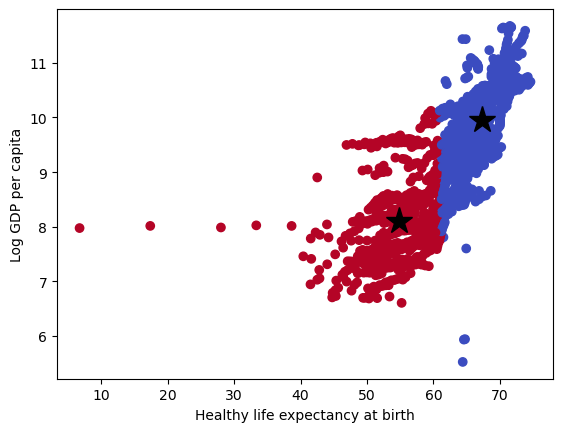

In [42]:
# B1.4
plt.scatter(
x=happiness_report['Healthy life expectancy at birth'],
y=happiness_report['Log GDP per capita'],
c=kmeans.labels_,
cmap='coolwarm')
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Log GDP per capita')
plt.show()

In this k-means clustering plot, I have created a scatter diagram displaying the variables GDP per capita and healthy life expectancy at birth. This diagram features two clusters: the red cluster (Cluster A) represents countries with lower GDP per capita and shorter healthy life expectancy at birth, while the blue cluster (Cluster B) represents countries with higher GDP per capita and longer healthy life expectancy at birth, both clusters have simillar numbers of data points (country).

Cluster A: This cluster appears to be elongated and tilted, all points on the graph are spread out and the centroid of this cluster is around (55,8). The presence of several outliers spread across the x-axis may indicate unique characteristics or anomalies within the data.

Cluster B: This cluster appears to be elongated and tilted as well, the points on the graph appear to be more compact and the centroid of this cluster is around (67,10). There are also several outliers, however it is spread across the y-axis.